In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

def read_data():
    data = pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')
    print(data.describe())
    
    print(data.isna().sum())
    return data



units = ['years', 'ST depression', 'type', 'mm/Hg', 'mg/dl', 'gender', 'type', 'beats per minute', 'type', 'mg/dl', 'type', 'type']
data_df = read_data()

               age          sex  chest_pain_type  resting_bps  cholesterol  \
count  1190.000000  1190.000000      1190.000000  1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773   132.153782   210.363866   
std       9.358203     0.424884         0.935480    18.368823   101.420489   
min      28.000000     0.000000         1.000000     0.000000     0.000000   
25%      47.000000     1.000000         3.000000   120.000000   188.000000   
50%      54.000000     1.000000         4.000000   130.000000   229.000000   
75%      60.000000     1.000000         4.000000   140.000000   269.750000   
max      77.000000     1.000000         4.000000   200.000000   603.000000   

       fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487

From this description we can see that we have 1190 different samples containing 12 features. Standardisation can be performed on the features resting_bps, cholesterol, max_hearth_rate, oldpeak and ST_slope. And so far it seems that cholesterol, fasting_blood_sugar will need outlier removal. We can also see that we don't have any NA values.

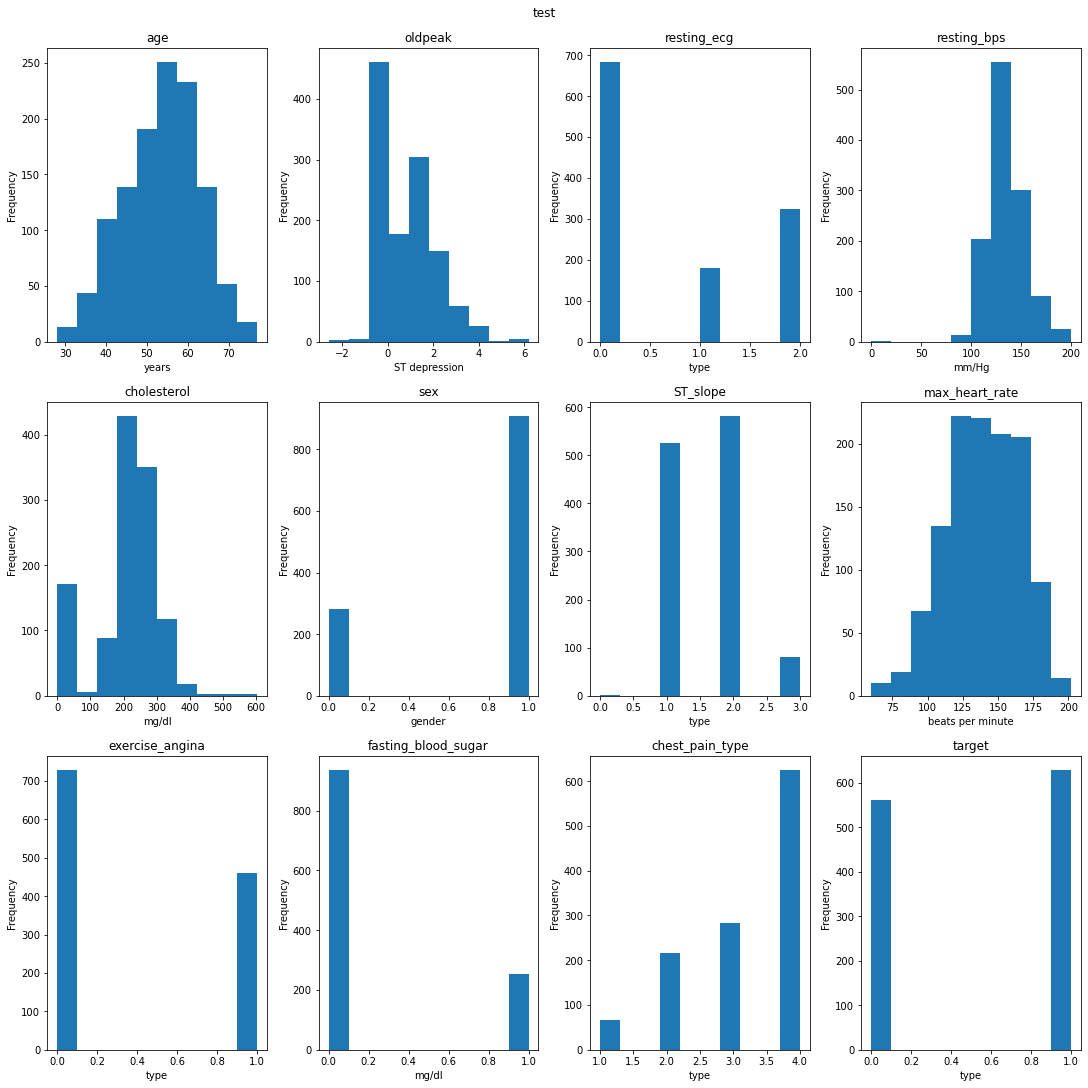

In [2]:
import seaborn as sns

def plot_hist(data, units):
    i=0
    j=0
    fig, axs = plt.subplots(3,4, squeeze=False, constrained_layout=True, figsize=(15,15))
    for col in data:
        if i == 3: i=0
        if j == 4: j=0
        
        #sns.distplot(data[col], rug=False, ax=axs[i,j])
        axs[i,j].hist(data[col])
        axs[i,j].set_xlabel(units[(i*4)+(j)])
        axs[i,j].set_ylabel('Frequency')
        axs[i,j].set_title(col)

        i+=1
        j+=1
    
    fig.suptitle('test')
    fig.show()
    plt.show(block=False)
plot_hist(data_df, units)

From the histogram we can conclude the following:
* resting_ecg contains allot 0 values (is supposed to)
* Sex is verry imbalanced, 8:2
* The target (disease or not) is balanced, this makes model training easier.

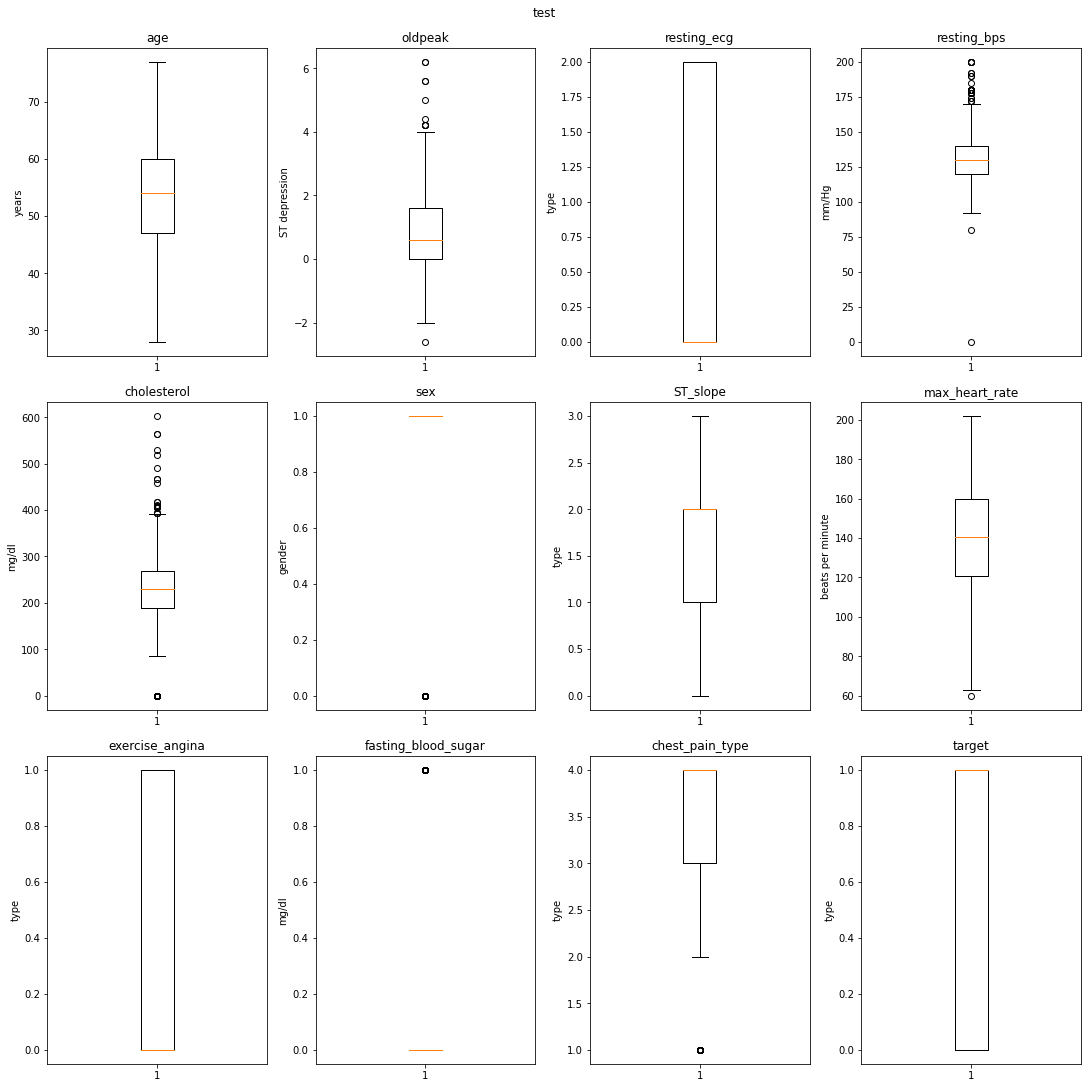

In [3]:
def plot_box(data, units):
    
    i=0
    j=0
    fig, axs = plt.subplots(3,4, squeeze=False, constrained_layout=True, figsize=(15,15))
    for col in data:
        if i == 3: i=0
        if j == 4: j=0
        
        axs[i,j].boxplot(data[col])
        axs[i,j].set_ylabel(units[(i*4)+(j)])
        axs[i,j].set_title(col)

        i+=1
        j+=1
    
    fig.suptitle('test')
    fig.show()
    plt.show(block=False)\

plot_box(data_df, units)

From the barplots we can conclude the following:
* oldpeak has a few outliers, which should be checked
* resting_bps has a 0 value, which is impossible, even if above 175 seems like outliers it's still within reason however these people have serious problems
* Cholesterol contains a few outliers (600 and 500 values), and also contains a few 0 values(also impossible)
* max hearth rate, a max heart rate of 60 is low but within reason however this value should be monitored

In [4]:
from sklearn.preprocessing import StandardScaler

def clean_data(data):
    data = data.loc[data['resting_bps'] != 0]
    data = data.loc[data['cholesterol'] != 0]
    data = data.loc[data['cholesterol'] < 400]
    return data

#normalise resting_bps, cholesterol, max_hearth_rate
def normalise_data(data):
    scaler = StandardScaler()
    col_names = ['resting_bps', 'cholesterol', 'max_heart_rate']
    features = data[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    data[col_names] = features
    return data

cleaned_data = clean_data(data_df)
st_data = normalise_data(cleaned_data)
print(st_data.describe())


               age          sex  chest_pain_type   resting_bps   cholesterol  \
count  1001.000000  1001.000000      1001.000000  1.001000e+03  1.001000e+03   
mean     53.268731     0.739261         3.157842 -3.143783e-16 -3.393889e-17   
std       9.406206     0.439257         0.956588  1.000500e+00  1.000500e+00   
min      28.000000     0.000000         1.000000 -2.315914e+00 -3.199122e+00   
25%      46.000000     0.000000         2.000000 -7.173317e-01 -6.951615e-01   
50%      54.000000     1.000000         3.000000 -1.464094e-01 -6.408209e-02   
75%      60.000000     1.000000         4.000000  4.245130e-01  6.484269e-01   
max      77.000000     1.000000         4.000000  3.850047e+00  3.091315e+00   

       fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
count          1001.000000  1001.000000    1.001000e+03      1001.000000   
mean              0.159840     0.737263    2.464451e-16         0.371628   
std               0.366641     0.896605    1.000500

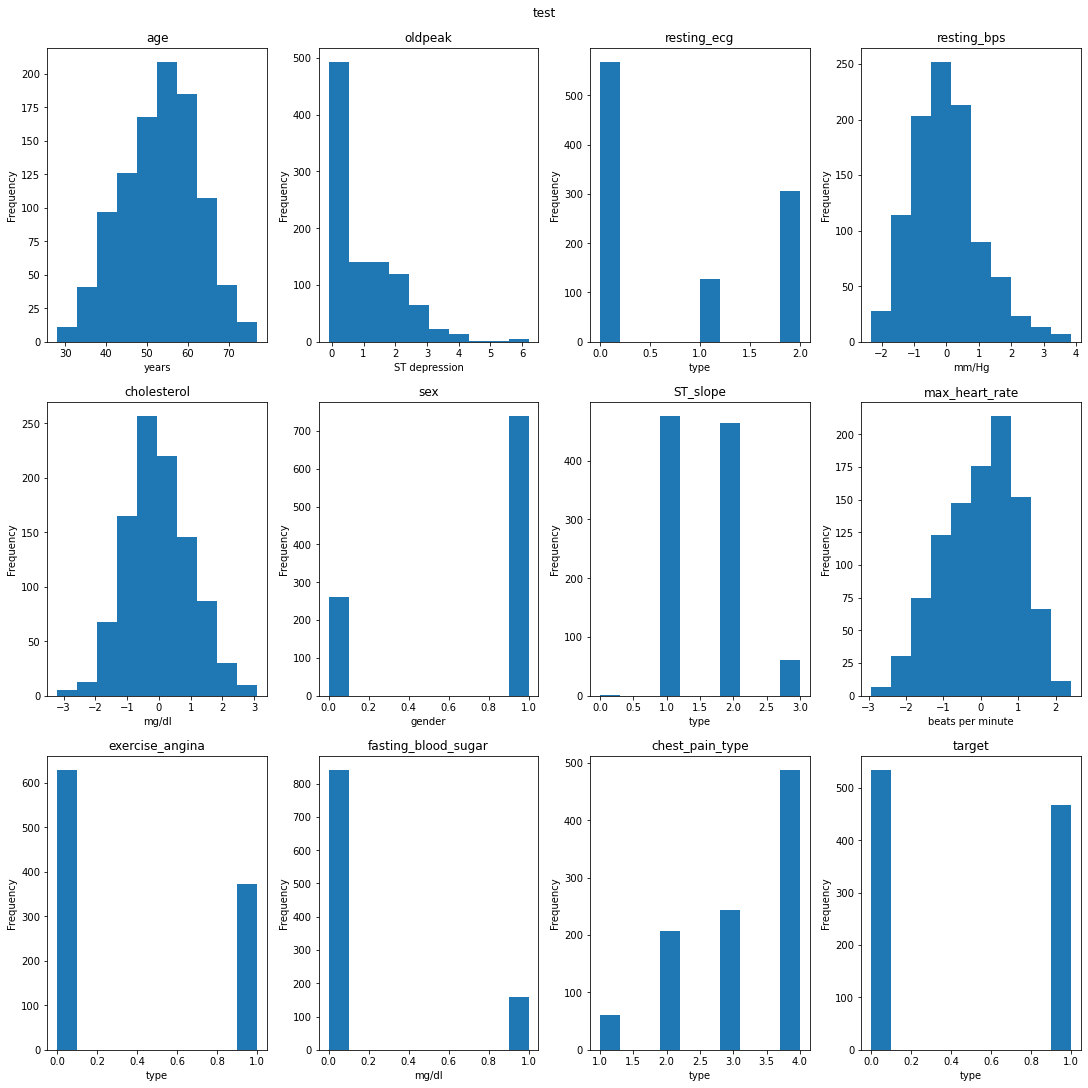

In [5]:
plot_hist(cleaned_data, units)


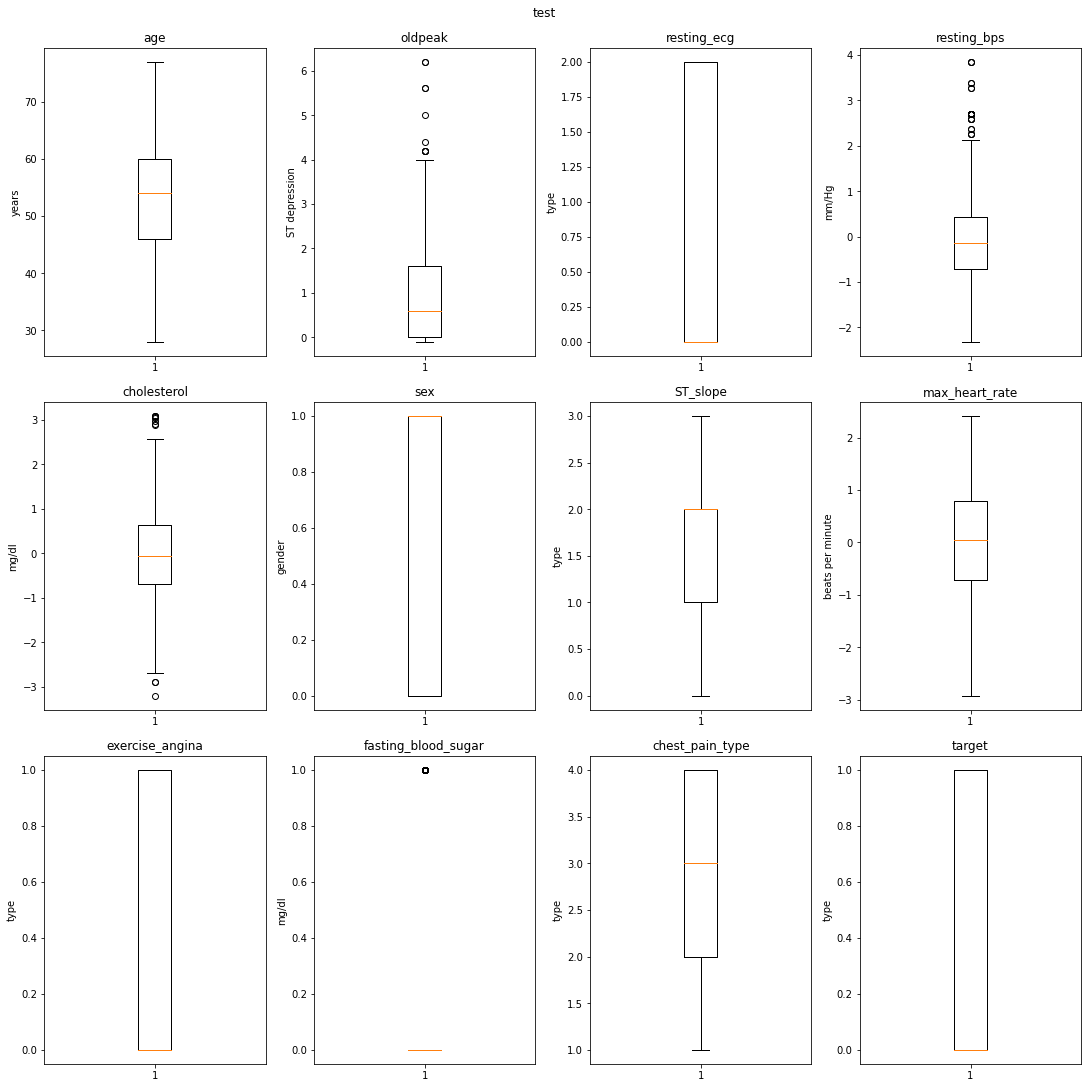

In [6]:
plot_box(cleaned_data, units)

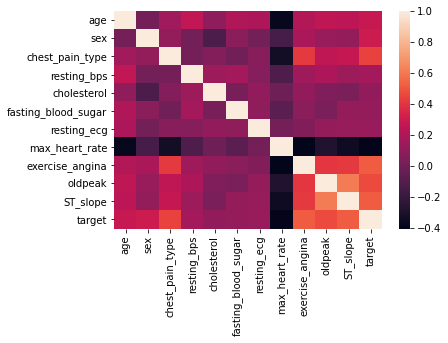

In [7]:
corr = st_data.corr(method ='pearson')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
st_data.corr(method ='pearson')
st_data.to_csv('data/st_filt_data.csv', index=False)